In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [3]:
from google.colab import files
uploaded= files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [4]:
train= pd.read_csv("SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test= pd.read_csv("SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
pie_plot=train['Salary'].value_counts().reset_index()
pie_plot

,Salary,count
0,<=50K,22653
1,>50K,7508


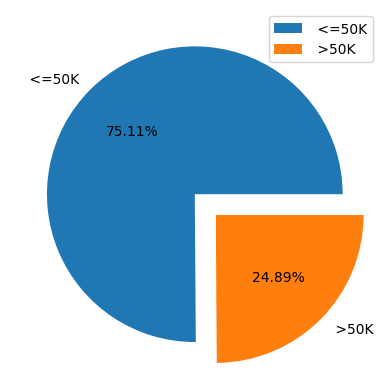

In [13]:
plt.pie(pie_plot['count'],labels=pie_plot['Salary'],explode=(0,0.2),autopct='%1.2f%%')
plt.legend()
plt.show()

In [14]:
pie_plot_t=test['Salary'].value_counts().reset_index()
pie_plot_t

,Salary,count
0,<=50K,11360
1,>50K,3700


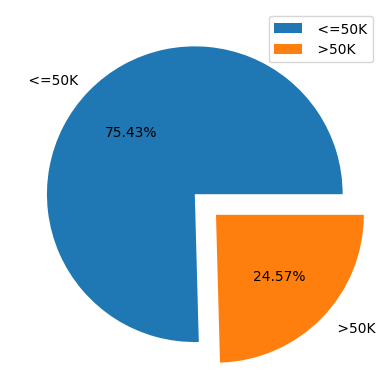

In [15]:
plt.pie(pie_plot_t['count'],labels=pie_plot['Salary'],explode=(0,0.2),autopct='%1.2f%%')
plt.legend()
plt.show()

In [16]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

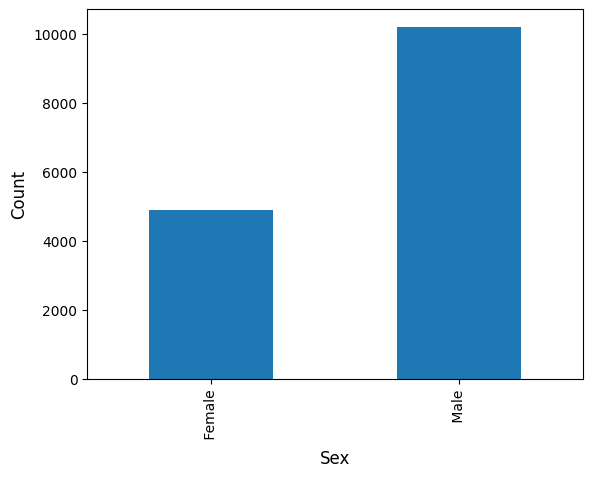

In [17]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

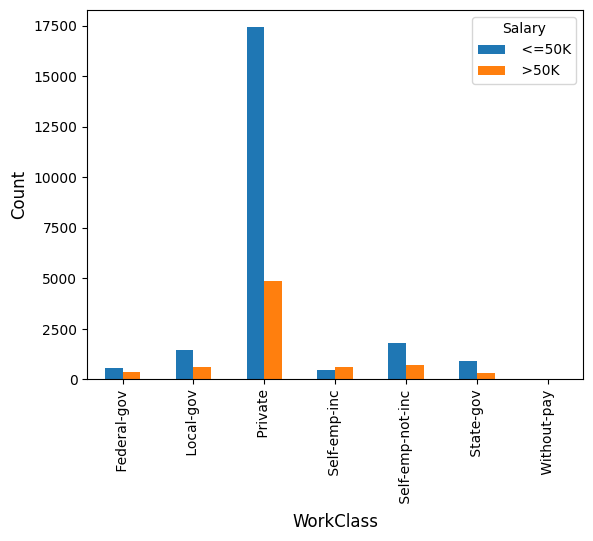

In [18]:
pd.crosstab(train.workclass,train.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

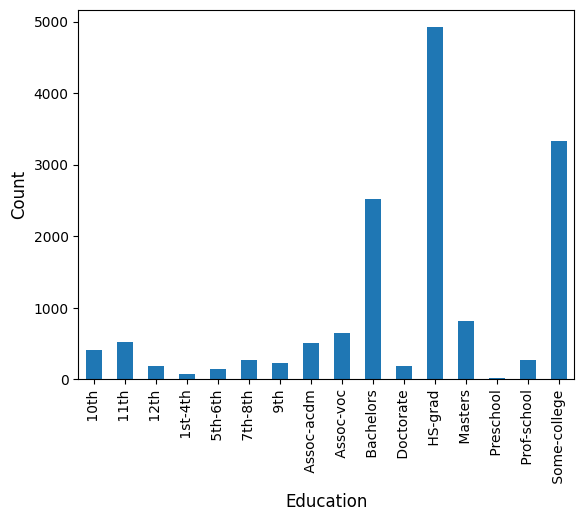

In [19]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

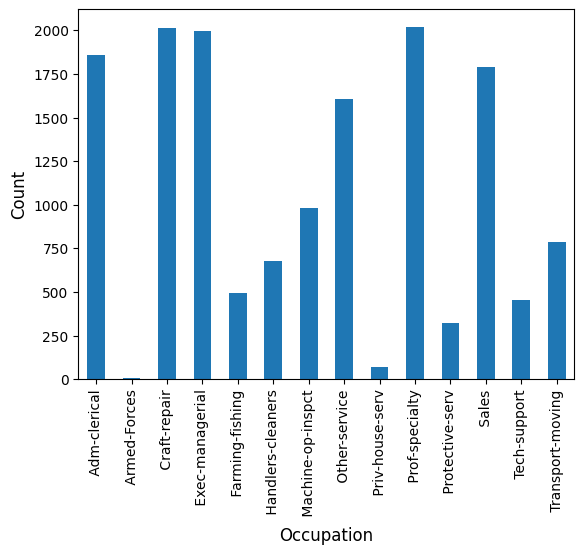

In [20]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

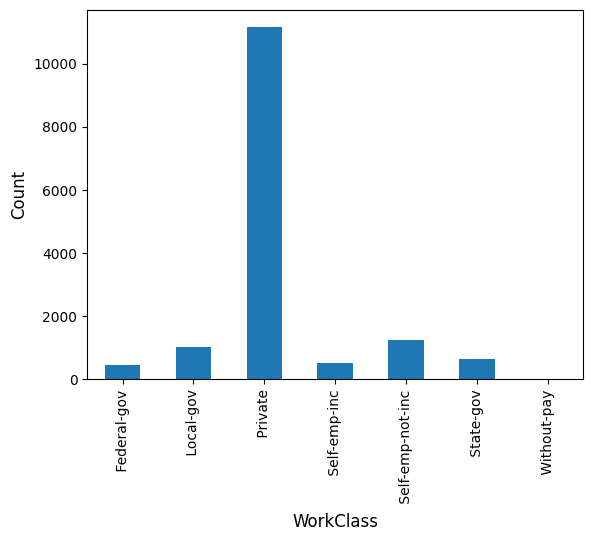

In [21]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [30]:
numeric_columns = train.select_dtypes(include=['int64', 'float64'])
numeric_columns

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30156,27,12,0,0,38
30157,40,9,0,0,40
30158,58,9,0,0,40
30159,22,9,0,0,20


In [31]:
corr= numeric_columns.corr()

<Axes: >

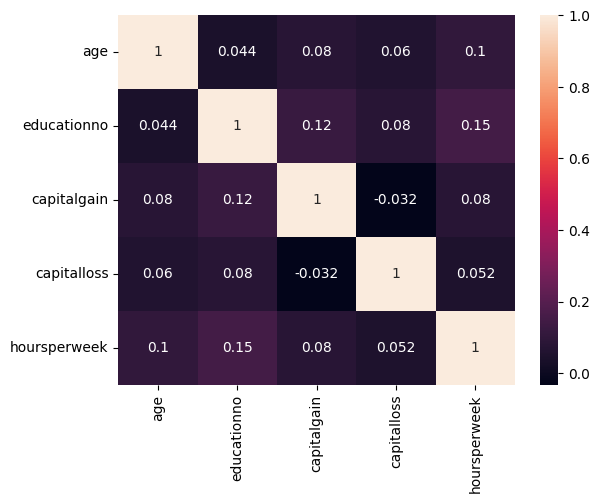

In [32]:
sns.heatmap(corr,annot=True)

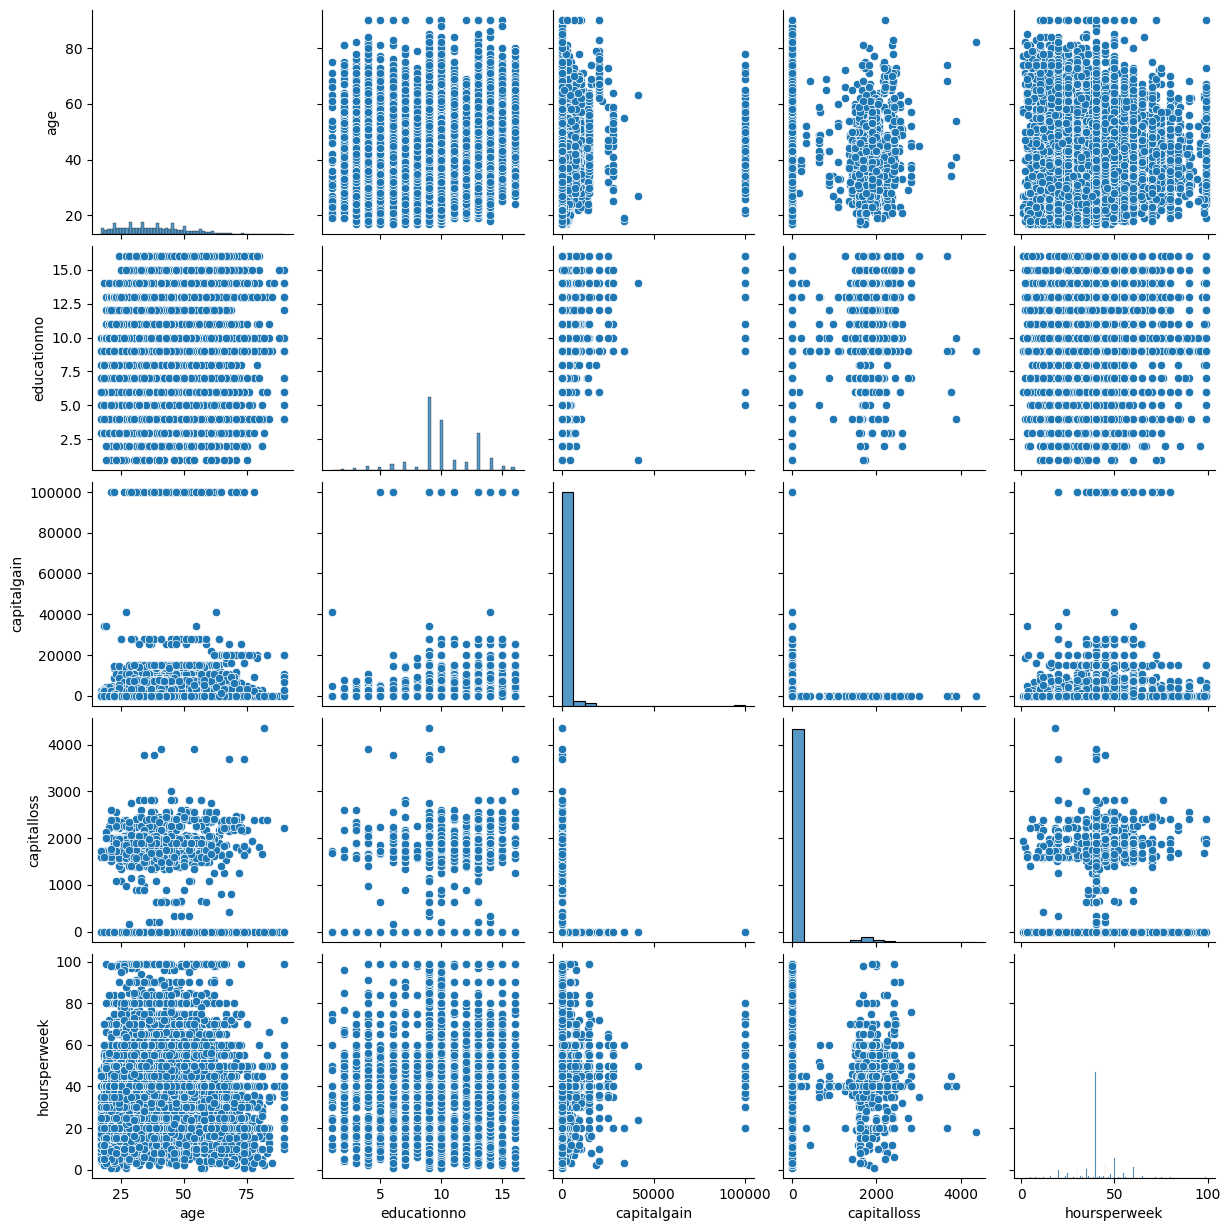

In [33]:
sns.pairplot(train)

**Outliers**

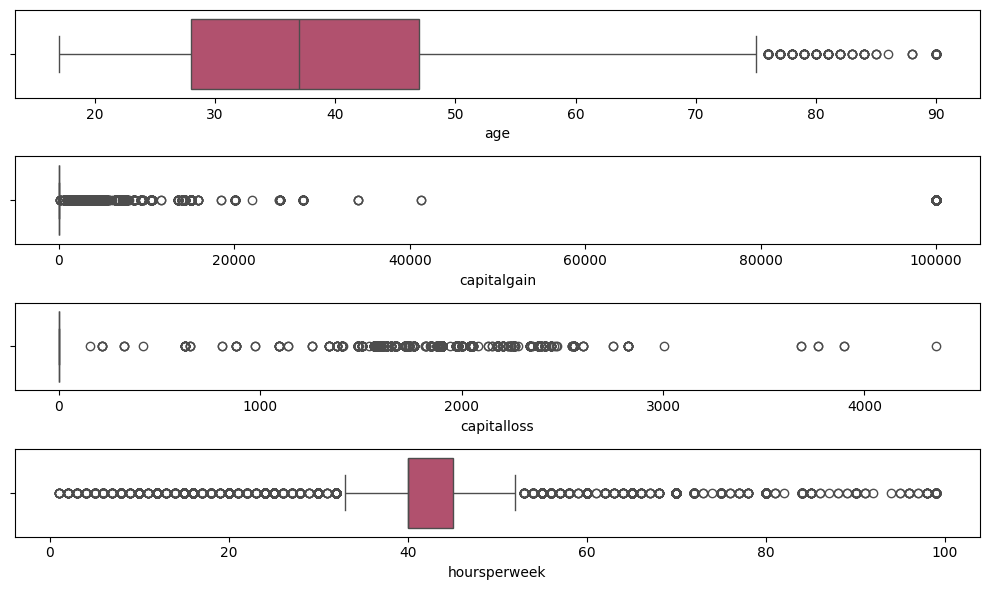

In [39]:
outlier1 = train.copy()
fig, axes=plt.subplots(4,1,figsize=(10,6),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='flare',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='flare',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='flare',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='flare',ax=axes[3])
plt.tight_layout()
plt.show()

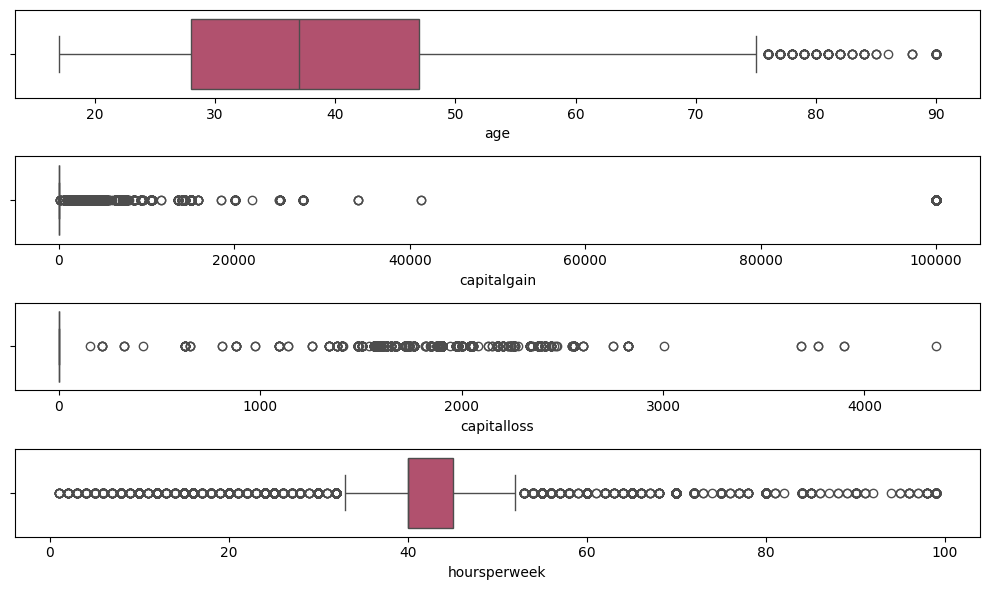

In [38]:
outlier2 = test.copy()
fig, axes=plt.subplots(4,1,figsize=(10,6),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='flare',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='flare',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='flare',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='flare',ax=axes[3])
plt.tight_layout()
plt.show()

In [40]:
le= LabelEncoder()
col=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex','native']
for i in col:
  train[i]=le.fit_transform(train[i])
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [44]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [45]:
le= LabelEncoder()
col=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex','native']
for i in col:
  test[i]=le.fit_transform(test[i])
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [46]:
test['Salary']=[0 if i.strip()=='<=50K' else 1 for i in test['Salary']]

In [47]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# **Model Building**

In [48]:
x_train = train.drop(['Salary'],axis=1)
y_train = train[['Salary']]

x_test = test.drop(['Salary'],axis=1)
y_test = test[['Salary']]

In [49]:
print('X_train Shape :', x_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape  :', x_test.shape)
print('y_test Shape  :', y_test.shape)

X_train Shape : (30161, 13)
y_train Shape : (30161, 1)
X_test Shape  : (15060, 13)
y_test Shape  : (15060, 1)


# **Model Training**

In [50]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [51]:
y_pred= svc.predict(x_test)

In [52]:
print(confusion_matrix(y_test,y_pred))

[[10997   363]
 [ 2703   997]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



In [54]:
svc.score(x_test,y_test)

0.7964143426294821

In [55]:
sm= SMOTE()
x_resampled, y_resampled=sm.fit_resample(x_train,y_train)

In [56]:
x_resampled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,51,2,6,5,2,2,0,4,1,0,0,49,37
45302,63,2,11,9,2,2,0,4,1,0,0,40,37
45303,46,0,15,10,2,0,0,2,1,0,0,40,37
45304,43,2,11,9,0,0,4,4,0,0,0,40,37


In [57]:
sv=SVC(C=2,gamma=0.01)
svc.fit(x_resampled,y_resampled)

SVC()

In [58]:
y_pred=svc.predict(x_test)

In [63]:
print(confusion_matrix(y_test,y_pred))

[[10837   523]
 [ 2609  1091]]


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.68      0.29      0.41      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.62      0.64     15060
weighted avg       0.77      0.79      0.76     15060



In [61]:
svc.score(x_resampled,y_resampled)

0.6272016951397166

In [62]:
svc.score(x_test,y_test)

0.7920318725099602

# **Feature Selection**

In [64]:
def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

Feature 0: 7927.146247
Feature 1: 4.061261
Feature 2: 264.815807
Feature 3: 2178.317438
Feature 4: 982.227659
Feature 5: 218.597378
Feature 6: 3435.382731
Feature 7: 29.339535
Feature 8: 459.219298
Feature 9: 74124662.376269
Feature 10: 1258785.769299
Feature 11: 5569.194066
Feature 12: 16.707320


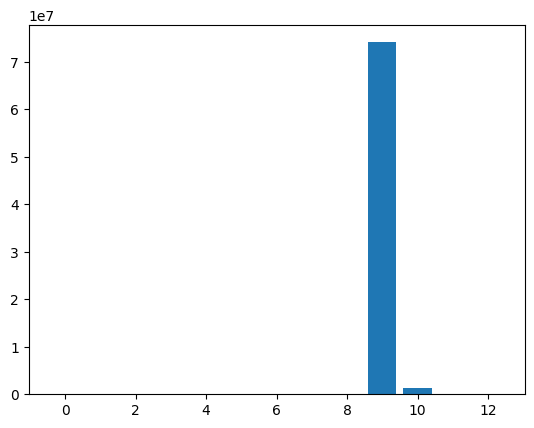

In [65]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [66]:
train_data = train.copy()
train_data.drop(train_data.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
train_data

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,2,0,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,0,0,0,40,0
4,28,13,2,5,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,2,5,0,0,38,0
30157,40,9,2,0,0,0,40,1
30158,58,9,6,4,0,0,40,0
30159,22,9,4,3,0,0,20,0


In [67]:
X_train = train_data.drop(['Salary'],axis=1)
Y_train = train_data[['Salary']]

In [68]:
test_data = test.copy()
test_data.drop(test_data.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
test_data

,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,0,0,40,0
1,38,9,2,0,0,0,50,0
2,28,12,2,0,0,0,40,1
3,44,10,2,0,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,3,0,0,40,0
15056,39,13,0,1,0,0,36,0
15057,38,13,2,0,0,0,50,0
15058,44,13,0,3,5455,0,40,0


In [69]:
X_test = test_data.drop(['Salary'],axis=1)
Y_test = test_data[['Salary']]

In [70]:
%%time
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_train,Y_train)

CPU times: user 40.5 s, sys: 173 ms, total: 40.7 s
Wall time: 44.7 s


SVC(C=3.0, gamma=0.01, random_state=10)

In [71]:
y_pred=svc.predict(X_test)

In [72]:
print(confusion_matrix(y_test,y_pred))

[[10930   430]
 [ 1708  1992]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11360
           1       0.82      0.54      0.65      3700

    accuracy                           0.86     15060
   macro avg       0.84      0.75      0.78     15060
weighted avg       0.85      0.86      0.85     15060



In [74]:
svc.score(X_train,Y_train)

0.8616093630847783

In [75]:
svc.score(X_test,Y_test)

0.8580345285524569